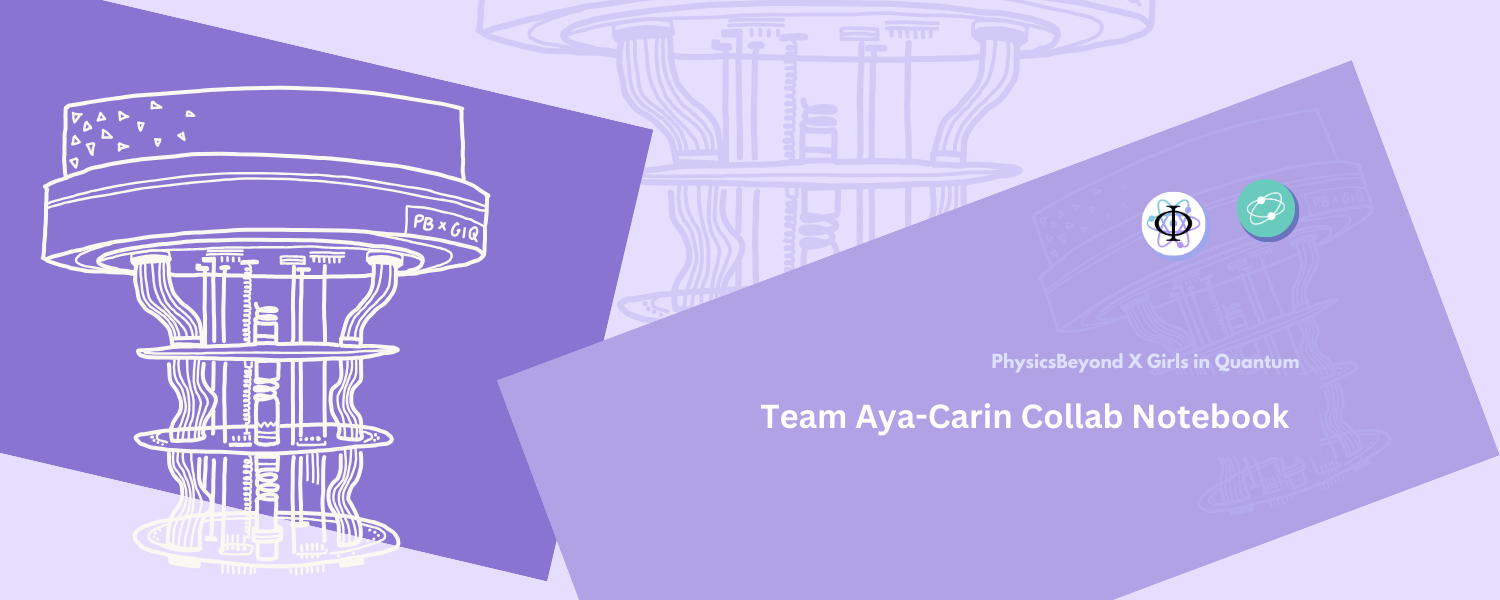

## Hello and Welcome!

Welcome to our experimental lab! Here, we demostrate the outcomes of our research. Playing around with qubits, gates and circuits sounds like a lot of fun!

#Qiskit section
In this section , we are going to be playing around with some basic quantum gates and observing their behaviors when put together , also exploring various types of gates like Clifford gates (e.g. Hadamard gate), single qubit: gates (e.g. Pauli-X, Pauli-Y .. etc) and also standard rotation gates (e.g. Rx gate and Ry gate).



#Necessary Libraries 📚
Please make sure to run these cells in order to see the magic!


In [ ]:
! pip3 install --upgrade pip
! pip install qiskit[visualization]==0.46
! pip install qiskit-aer
import qiskit
qiskit.version.get_version_info()
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, visualize_transition
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, visualize_transition
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from math import pi
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector



<ipython-input-75-5a7054fe47cf>:20: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer


#Exploring Quantum Gates and Circuits ⚛️
Quantum gates and circuits play a pivotal role in quantum computing. These gates are analogous to classical logic gates but operate on quantum bits (qubits). By applying specific gates in a sequence, we manipulate qubits to perform quantum operations. Quantum circuits, composed of interconnected gates, represent complex quantum algorithms. These gates enable superposition, entanglement, and quantum parallelism, allowing quantum computers to solve problems exponentially faster than classical counterparts. Their significance lies in unlocking the potential of quantum computation for cryptography, optimization, and scientific simulations. 🚀🔑🌌

1. Defining qubits and circuits

In [ ]:
qubits=QuantumRegister(5,'q')
bits=ClassicalRegister(5,'c')
qc=QuantumCircuit(qubits,bits)
#Lets check our circuit
qc.qubits

[Qubit(QuantumRegister(5, 'q'), 0),
 Qubit(QuantumRegister(5, 'q'), 1),
 Qubit(QuantumRegister(5, 'q'), 2),
 Qubit(QuantumRegister(5, 'q'), 3),
 Qubit(QuantumRegister(5, 'q'), 4)]

2. Let's apply an H gate to the first and second qubits

In [ ]:
qc.h(0)
qc.h(1)
#Let's print our circuit
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
c: 5/═════

3.Let's add some more gates! Try adding CNOT gates between qubits 0 and 1 , 2 and 1

In [ ]:
qc.cx(0,2)
qc.cx(1,2)
qc.draw()

┌───┐          
q_0: ┤ H ├──■───────
     ├───┤  │       
q_1: ┤ H ├──┼────■──
     └───┘┌─┴─┐┌─┴─┐
q_2: ─────┤ X ├┤ X ├
          └───┘└───┘
q_3: ───────────────
                    
q_4: ───────────────
                    
c: 5/═══════════════

5. Let's play around with X and Z gate and explore simulation with the unitary

In [ ]:
qc.x(0)
qc.z(1)
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")


<ipython-input-58-f6126faed0b2>:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  unitary = usim.run(qobj).result().get_unitary()


<IPython.core.display.Latex object>

Let's draw the final shape of the circuit

In [ ]:
qc.draw()

┌───┐     ┌───┐      unitary 
q_0: ┤ H ├──■──┤ X ├─────────░────
     ├───┤  │  └───┘┌───┐    ░    
q_1: ┤ H ├──┼────■──┤ Z ├────░────
     └───┘┌─┴─┐┌─┴─┐└───┘    ░    
q_2: ─────┤ X ├┤ X ├─────────░────
          └───┘└───┘         ░    
q_3: ────────────────────────░────
                             ░    
q_4: ────────────────────────░────
                             ░    
c: 5/═════════════════════════════

## Another adventure!
Now , let's get deeper and play around more with some gates and circuits and try simulating them in innovative ways!🤩

1. Let's create a new circuit

In [ ]:
qubits=QuantumRegister(3,'q')
bits=ClassicalRegister(3,'c')
qctwo=QuantumCircuit(qubits,bits)
#Lets check our circuit
qctwo.qubits

[Qubit(QuantumRegister(3, 'q'), 0),
 Qubit(QuantumRegister(3, 'q'), 1),
 Qubit(QuantumRegister(3, 'q'), 2)]

 Quantum rotational gates are fundamental operations in quantum computing that manipulate the state of qubits by rotating them around specific axes on the Bloch sphere. These gates change the probability amplitudes and phases of qubits, allowing for superposition and entanglement. Examples include the Hadamard gate (rotates around the X-axis), the phase gate (rotates around the Z-axis), and the Y gate (rotates around the Y-axis). These rotations are essential for creating complex quantum algorithms and solving specific problems efficiently. 🌐🔀🔒

2. What about playing around with some quantum rotational gates?😎


In [ ]:
#Here we applied standarad rotational gates, one on each qubit in a circuit.
qctwo.rx(pi/2,0)
qctwo.ry(pi/2,1)
qctwo.rz(pi/2,2)
qctwo.draw()

┌─────────┐
q_0: ┤ Rx(π/2) ├
     ├─────────┤
q_1: ┤ Ry(π/2) ├
     ├─────────┤
q_2: ┤ Rz(π/2) ├
     └─────────┘
c: 3/═══════════

Let's add some gates to these qubits

In [ ]:
qctwo.y(0)
qctwo.z(1)
qctwo.cx(0,2)
qctwo.draw()

┌─────────┐┌───┐     
q_0: ┤ Rx(π/2) ├┤ Y ├──■──
     ├─────────┤├───┤  │  
q_1: ┤ Ry(π/2) ├┤ Z ├──┼──
     ├─────────┤└───┘┌─┴─┐
q_2: ┤ Rz(π/2) ├─────┤ X ├
     └─────────┘     └───┘
c: 3/═════════════════════

We can also represent the outcomes of this circuit in a form of a statevector as follow.

In [ ]:
qctwo.save_statevector()
qobj = assemble(qctwo)
result = svsim.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<ipython-input-73-73524914ac59>:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = svsim.run(qobj).result()


<IPython.core.display.Latex object>

Let's represent the outcomes on a Bloch Sphere! 🌐

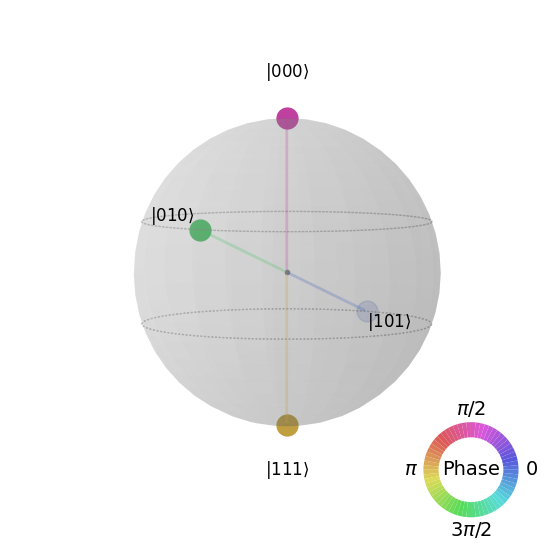

In [ ]:
plot_state_qsphere(final_state)



---



#Pennylane Section


##Necessary Libraries
Please make sure to run these libraries before starting the journey!

In [ ]:
!pip install pennylane --upgrade
import pennylane as qml
import numpy as np
from keras.datasets import mnist

import matplotlib as mpl
import matplotlib.pyplot as plt

##Bell States?
Bell states, also known as EPR pairs, are specific quantum states of two qubits that represent the simplest examples of quantum entanglement. These states are a form of entangled and normalized basis vectors. Their significance lies in demonstrating the non-classical correlations between qubits, which cannot be explained by classical hidden variables. Bell states play a crucial role in quantum communication protocols like superdense coding and quantum teleportation. Understanding them helps unlock the power of quantum information processing and highlights the fundamental differences between classical and quantum systems!

1.Let's define our the qubits we're going to use and also the device.
Within the device we specify the number of qubits, which in PennyLane are called wires. In this case we have 2 qubits (2 wires). Finally, we have specified the number of shots for this device.

In [ ]:
qubit = 4
dev = qml.device("default.qubit", wires=qubit, shots=300 )

In [ ]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.broadcast(unitary=qml.CNOT, pattern="chain", wires=range(qubit))
    return [qml.sample(qml.PauliZ(i)) for i in range(qubit)]

Now, let's print the results!

In [ ]:
res = circuit()
isBell = [np.all(res[i] == res[i+1]) for i in range(qubit-1)]
print(isBell)

[tensor(True, requires_grad=True), tensor(True, requires_grad=True), tensor(True, requires_grad=True)]
